# WeatherPy
----------------
### Analysis
- Based on these data, there appears to be a strong relationship between temperature and distance from the equator resulting in higher temperatures in cities that are closer to the equator. 
- There appears to be a weak relationship between humidity and latitude, in which cities near the equator and the poles have higher humidity levels, with the cities midway between the equator and poles having lower humidity levels.
- There also appears to be a weak relationship between wind speed and latitude, in which wind speed appears to increase with distance from the equator.
---------------------------

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn
import requests
import json
import random
from citipy import citipy
from config import weather_api_key

## Generate Cities List

In [2]:
city_list = []
for i in range(1000):
    random_latitude = random.randrange(-90,90)
    random_longitude = random.randrange(-180,180)
    city = citipy.nearest_city(random_latitude, random_longitude).city_name
    city_list.append(city)

len(city_list)

1000

## Perform API Calls

In [3]:
def getWeather(city_list):
    i = 1
    weather_data = []
    for city in city_list:
        # Save config information
        url = "http://api.openweathermap.org/data/2.5/weather?"
        city_link = city.replace(" ","%20")

        # Build query URL
        query_url = url + "appid=" + weather_api_key + "&units=" + 'Imperial'+ "&q=" + city_link

        # Print log of each city as it's being processed
        print(f"#{i}: {city} {query_url}")
        
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        try:
            name = weather_json['name']
        
            # Get the latitude, temperature (F), humidity(%), cloudiness(%), and wind speed data from the json response
            latitude = weather_json['coord']['lat']
            longitude = weather_json['coord']['lon']
            prox = np.abs(float(latitude))
            #print(prox)
            temp = weather_json['main']['temp']
            humidity = weather_json['main']['humidity']
            clouds = weather_json['clouds']['all']
            wind_speed = weather_json['wind']['speed']
            weather_data.append({"City":name, 
                                 "Latitude":latitude, 
                                 "Longitude":longitude,
                                 "Proximity to Equator":prox,
                                 "Temperature (F)":temp, 
                                 "Humidity (%)":humidity, 
                                 "Cloudiness (%)":clouds, 
                                 "Wind Speed (mph)":wind_speed})
        except:
            pass
        
        i += 1
        
    return weather_data


In [4]:
# Call getWeather() function on randomly generated city_list
weather_data = getWeather(city_list)

#1: ancud http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ancud
#2: kurumkan http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kurumkan
#3: barrow http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=barrow
#4: mahebourg http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mahebourg
#5: ushuaia http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ushuaia
#6: grand gaube http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=grand%20gaube
#7: ilulissat http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ilulissat
#8: hobart http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hobart
#9: 

#67: tsihombe http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tsihombe
#68: alofi http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=alofi
#69: kodinsk http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kodinsk
#70: saldanha http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saldanha
#71: rawson http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=rawson
#72: hobart http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hobart
#73: chokurdakh http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=chokurdakh
#74: faanui http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=faanui
#75: sou

#133: atbasar http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=atbasar
#134: yellowknife http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=yellowknife
#135: ushuaia http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ushuaia
#136: tulua http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tulua
#137: albany http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=albany
#138: yerofey pavlovich http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=yerofey%20pavlovich
#139: khor http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=khor
#140: hermanus http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=

#198: saint-philippe http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saint-philippe
#199: hovd http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hovd
#200: amderma http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=amderma
#201: mataura http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mataura
#202: normandin http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=normandin
#203: thompson http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=thompson
#204: lawrenceville http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lawrenceville
#205: mataura http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb

#263: pemangkat http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=pemangkat
#264: busselton http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=busselton
#265: lompoc http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lompoc
#266: avarua http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=avarua
#267: saint anthony http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saint%20anthony
#268: saint-philippe http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saint-philippe
#269: punta arenas http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=punta%20arenas
#270: busselton http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e

#328: atuona http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=atuona
#329: one hundred mile house http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=one%20hundred%20mile%20house
#330: huarmey http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=huarmey
#331: muros http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=muros
#332: marawi http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=marawi
#333: tucuma http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tucuma
#334: illoqqortoormiut http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=illoqqortoormiut
#335: kuusamo http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f

#393: thompson http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=thompson
#394: caluquembe http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=caluquembe
#395: flinders http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=flinders
#396: erie http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=erie
#397: yulara http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=yulara
#398: mabaruma http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mabaruma
#399: bedford http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=bedford
#400: gizo http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=gizo
#4

#459: upernavik http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=upernavik
#460: dauphin http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=dauphin
#461: narsaq http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=narsaq
#462: mackay http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mackay
#463: saskylakh http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saskylakh
#464: belyy yar http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=belyy%20yar
#465: victor harbor http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=victor%20harbor
#466: port elizabeth http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0

#524: vaini http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=vaini
#525: natal http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=natal
#526: kuche http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kuche
#527: illoqqortoormiut http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=illoqqortoormiut
#528: dikson http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=dikson
#529: busselton http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=busselton
#530: ushuaia http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ushuaia
#531: louisbourg http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial

#589: ushuaia http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ushuaia
#590: tuapse http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tuapse
#591: puerto ayora http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=puerto%20ayora
#592: santo tomas http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=santo%20tomas
#593: ancud http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ancud
#594: beruni http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=beruni
#595: punta arenas http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=punta%20arenas
#596: airai http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&u

#655: road town http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=road%20town
#656: hobart http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hobart
#657: kamenka http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kamenka
#658: rikitea http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=rikitea
#659: gangotri http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=gangotri
#660: severo-kurilsk http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=severo-kurilsk
#661: tuktoyaktuk http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=tuktoyaktuk
#662: malumfashi http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0

#719: dingle http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=dingle
#720: asfi http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=asfi
#721: jamestown http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=jamestown
#722: batticaloa http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=batticaloa
#723: grand river south east http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=grand%20river%20south%20east
#724: puerto ayora http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=puerto%20ayora
#725: barrow http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=barrow
#726: huilong http://api.openweathermap.org/data/2.5/weather?appid=25bc90a119

#784: vaini http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=vaini
#785: kapaa http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kapaa
#786: upernavik http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=upernavik
#787: kapaa http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=kapaa
#788: mataura http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mataura
#789: rio gallegos http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=rio%20gallegos
#790: luderitz http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=luderitz
#791: aasiaat http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=aa

#849: busselton http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=busselton
#850: cairns http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=cairns
#851: qaanaaq http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=qaanaaq
#852: rikitea http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=rikitea
#853: dikson http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=dikson
#854: saraland http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saraland
#855: sovetskiy http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=sovetskiy
#856: pangnirtung http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&

#915: saskylakh http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=saskylakh
#916: nouadhibou http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=nouadhibou
#917: nizhneyansk http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=nizhneyansk
#918: cape town http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=cape%20town
#919: svit http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=svit
#920: ushuaia http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ushuaia
#921: lefka http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=lefka
#922: copaceni http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Impe

#979: provideniya http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=provideniya
#980: pevek http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=pevek
#981: mataura http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=mataura
#982: hobart http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=hobart
#983: seoul http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=seoul
#984: dikson http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=dikson
#985: albany http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=albany
#986: ialibu http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=Imperial&q=ialibu
#987: be

In [5]:
# Convert data to pandas dataframe
weather_df = pd.DataFrame(weather_data)
print(len(weather_df))
weather_df.head()

909


,City,Cloudiness (%),Humidity (%),Latitude,Longitude,Proximity to Equator,Temperature (F),Wind Speed (mph)
0,Ancud,12,77,-41.87,-73.83,41.87,45.33,5.75
1,Kurumkan,8,73,54.33,110.32,54.33,56.75,1.59
2,Barrow,64,53,-38.31,-60.23,38.31,49.47,11.90
3,Mahebourg,40,78,-20.41,57.70,20.41,71.60,4.70
4,Ushuaia,20,70,-54.81,-68.31,54.81,42.80,31.09


In [6]:
# Save a CSV of all data retrieved
weather_df.to_csv("weather_data.csv")

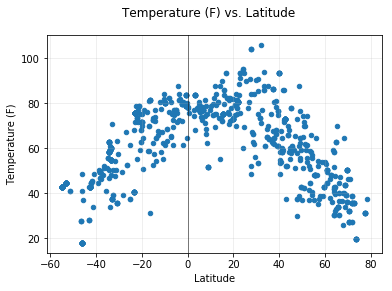

In [7]:
# Temperature (F) vs. Latitude scatterplot
weather_df.plot(kind='scatter', x="Latitude", y="Temperature (F)")
# weather_df.plot(kind='scatter', x="Proximity to Equator", y="Temperature (F)")

# Plot attributes
plt.suptitle("Temperature (F) vs. Latitude")
plt.grid(alpha=0.25)
plt.axvline(0, color="black", alpha=0.5, lw=1)

# Save plot as png
plt.savefig("temp_vs_lat")
plt.show()

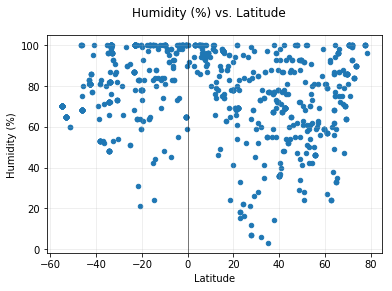

In [8]:
# * Humidity (%) vs. Latitude scatterplot
weather_df.plot(kind='scatter', x="Latitude", y="Humidity (%)")
# weather_df.plot(kind='scatter', x="Proximity to Equator", y="Humidity (%)")

# Plot attributes
plt.suptitle("Humidity (%) vs. Latitude")
plt.grid(alpha=0.25)
plt.axvline(0, color="black", alpha=0.5, lw=1)

# Save plot as png
plt.savefig("humidity_vs_lat")
plt.show()

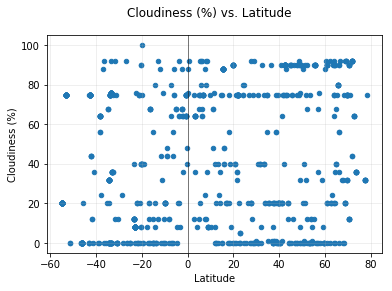

In [9]:
# * Cloudiness (%) vs. Latitude scatterplot
weather_df.plot(kind='scatter', x="Latitude", y="Cloudiness (%)")
# weather_df.plot(kind='scatter', x="Proximity to Equator", y="Cloudiness (%)")

# Plot attributes
plt.suptitle("Cloudiness (%) vs. Latitude")
plt.grid(alpha=0.25)
plt.axvline(0, color="black", alpha=0.5, lw=1)

# Save plot as png
plt.savefig("cloud_vs_lat")
plt.show()

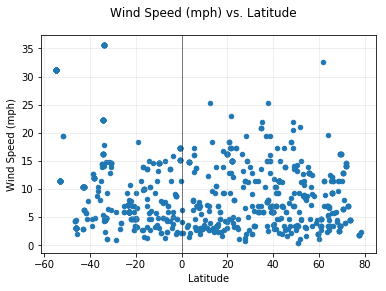

In [10]:
# * Wind Speed (mph) vs. Latitude scatterplot
weather_df.plot(kind='scatter', x="Latitude", y="Wind Speed (mph)")
# weather_df.plot(kind='scatter', x="Proximity to Equator", y="Wind Speed (mph)")

# Plot attributes
plt.suptitle("Wind Speed (mph) vs. Latitude")
plt.grid(alpha=0.25)
plt.axvline(0, color="black", alpha=0.5, lw=1)

# Save plot as png
plt.savefig("wind_vs_lat")
plt.show()